### Ex 1
Create a module containing a class with the following methods:
1. __init__(self, url_list)
2. download(url,filename) raises NotFoundException when url returns 404
3. multi_download() uses threads to download multiple urls as text and stores filenames as a property
4. __iter__() returns an iterator
5. __next__() returns the next filename (and stops when there are no more)
6. urllist_generator() returns a generator to loop through the urls
7. avg_vowels(text) - a rough estimate on readability returns average number of vowels in the words of the text
8. hardest_read() returns the filename of the text with the highest vowel score (use all the cpu cores on the computer for this work.

In [1]:
from concurrent.futures import ThreadPoolExecutor
from concurrent.futures import ProcessPoolExecutor
import multiprocessing
import requests
import os
import glob

if os.path.exists('downloads'):
    files = glob.glob('./downloads/*')
    for f in files:
        os.remove(f) 
else:
    os.makedirs('downloads')
    
def multithreading(func, args, workers=5):
    with ThreadPoolExecutor(workers) as ex:
        ex.map(func, args)
        
def multiprocessing(func, args, workers=multiprocessing.cpu_count()):
    with ProcessPoolExecutor(workers) as ex:
        res = ex.map(func, args)
    return list(res)

class Exe1:
    def __init__(self, url_list):
        self.url_list = url_list
        self.filenames = list()
    
    def download(self, url, filename):
        r = requests.get(url)
        if(r.status_code == 404):
            raise Exception('URL ' + url + " NOT FOUND")
        #print('',r.json()['url'])
        open('./downloads/' + filename + ".txt", 'wb').write(r.content)
        
    def milti_download_func(self, idx):
        try:
            filename = 'download_number_' + str(idx+1)
            self.download(self.url_list[idx], filename)
            self.filenames.append(filename)
        except:
            print('Could not download nr: ' + str(idx+1) + ', from URL: ' + self.url_list[idx])
        
    def multi_download(self):
        multithreading(self.milti_download_func, range(0,len(self.url_list)))
        
    def __iter__(self):
        self.iter_count = 0;
        return self
        
    def __next__(self):
        if self.iter_count < len(self.filenames):
            next = self.filenames[self.iter_count]
            self.iter_count += 1
            return next
        else:
            raise StopIteration
        
    def urllist_generator(self):
        num = 0
        while num < len(self.url_list):
            yield self.url_list[num]
            num += 1
        
    def avg_vowels(self, text):
        vowels = ['a', 'e', 'i', 'o', 'u', 'y']
        total_vowels_number = 0
        all_words = str(text).split(' ')
        for word in all_words:
            for letter in word:
                if str(letter).lower() in vowels:
                    total_vowels_number += 1
        avg_vowels_count = total_vowels_number/len(all_words)
        return avg_vowels_count
        
    def read_file(self, filename):
        filetext = open('./downloads/' + filename + '.txt', 'r').read()
        text_avg_vowels = self.avg_vowels(filetext)
        return filename, text_avg_vowels
    
    def hardest_read(self):
        hardest_read = {'File': 'No files to read', 'Score': 0}
        file_scores = multiprocessing(self.read_file, self.filenames)
        print(file_scores)
        for idx in range(0,len(file_scores)):
            if hardest_read['Score'] < file_scores[idx][1]:
                hardest_read['File'] = file_scores[idx][0]
                hardest_read['Score'] = file_scores[idx][1]
        return hardest_read['File'] + '.txt'
    
test = Exe1(['https://api.chucknorris.io/jokes/AH6GX1FOQWKbnXH75Vn-4A', 
             'https://api.chucknorris.io/jokes/ts2VbLrSR46ypk49NC-1LQ', 
             'https://api.chucknorris.io/jokes/dfeXBQtOTV6Vn15_5y56Ag',
             'https://api.chucknorris.io/jokes/lSygvqaIRfK6ZbrQz4FosA',
             'https://api.chucknorris.io/jokes/2dIYlHo7QNWSA1KMo3mMHQ'])
#test.download('https://httpbin.org/status/404', 'x')
#test.download('https://api.chucknorris.io/jokes/random', 'x')
#test.multi_download()
#test.avg_vowels('There is no way of knowing, if this will end well')
#test.hardest_read()

### Ex 2
Create a notebook and import your module from above
1. Find 10 books on https://www.gutenberg.org/browse/scores/top and download them using an object of the class you just created before
2. Test the different methods of your class

In [2]:
book_url_list = ['https://www.gutenberg.org/files/1342/1342-0.txt',
                'http://www.gutenberg.org/cache/epub/16328/pg16328.txt',
                'https://www.gutenberg.org/files/25344/25344-0.txt',
                'https://www.gutenberg.org/files/1250/1250-0.txt',
                'https://www.gutenberg.org/files/84/84-0.txt',
                'https://www.gutenberg.org/files/1952/1952-0.txt',
                'https://www.gutenberg.org/files/11/11-0.txt',
                'http://www.gutenberg.org/cache/epub/2542/pg2542.txt',
                'http://www.gutenberg.org/cache/epub/23/pg23.txt',
                'https://www.gutenberg.org/files/1080/1080-0.txt']

classObject = Exe1(book_url_list)
classObject.multi_download()
classObject.hardest_read()

[('download_number_2', 1.0573247506543113), ('download_number_4', 1.1633852483103144), ('download_number_6', 1.9178790429241312), ('download_number_5', 1.921684612239335), ('download_number_8', 1.8624352428161455), ('download_number_3', 1.8802345760277661), ('download_number_1', 1.2115146310709162), ('download_number_9', 1.8602308294209702), ('download_number_7', 1.8264384559359068), ('download_number_10', 2.0723771580345285)]


'download_number_10.txt'

3. Make a bar plot with a sorted list of books on x-axis and avg vowels on y-axis

['download_number_2', 'download_number_4', 'download_number_1', 'download_number_7', 'download_number_9', 'download_number_8', 'download_number_3', 'download_number_6', 'download_number_5', 'download_number_10']
[1.0573247506543113, 1.1633852483103144, 1.2115146310709162, 1.8264384559359068, 1.8602308294209702, 1.8624352428161455, 1.8802345760277661, 1.9178790429241312, 1.921684612239335, 2.0723771580345285]


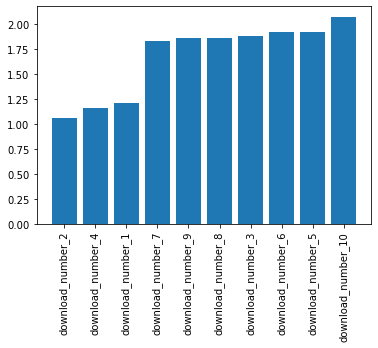

In [3]:
import matplotlib.pyplot as plt

all_files_list = list()
for filename in classObject.filenames:
    all_files_list.append(classObject.read_file(filename))
all_files_list.sort(key=lambda x:x[1])

x_values = []
y_values = []
for data in all_files_list:
    x_values.append(data[0])
    y_values.append(data[1])
print(x_values)
print(y_values)

plt.bar(x_values, y_values)
plt.xticks(rotation='vertical')
plt.show()

Note on how to import from a module above the current directory

In [4]:
import sys
sys.path.append("../../..")
from modules import webget
sys.path.pop()
print(sys.path)

['/home/jovyan/my_notebooks/Assignments/Week6', '/opt/conda/lib/python37.zip', '/opt/conda/lib/python3.7', '/opt/conda/lib/python3.7/lib-dynload', '', '/opt/conda/lib/python3.7/site-packages', '/opt/conda/lib/python3.7/site-packages/IPython/extensions', '/home/jovyan/.ipython']


Note on multiple arguments in multithread and processings

In [5]:
def testPrint(var1, var2, var3):
    print(var1)
    print(var2)
    print(var3)
    print('-----Done-----')    
    
def useTest():
    var1 = list(['Hej', 'Med', 'Dig'])
    var2 = list(['x', 'y', 'z'])
    var3 = list(['1', '2', '3'])
    args = [(var1[idx], var2[idx], var3[idx]) for idx in range(0,len(var1))]
    args = zip(var1, var2, var3)
    with ThreadPoolExecutor(5) as ex:
        ex.map(lambda p: testPrint(*p), args)
    
useTest()
var1 = list(['Hej', 'Med', 'Dig'])
var2 = list(['x', 'y', 'z'])
var3 = list(['1', '2', '3'])
#args = [(var1[idx], var2[idx], var3[idx]) for idx in range(0,len(var1))]
args = zip(var1, var2, var3)
print(args)
print(type(args))

Hej
x
1
-----Done-----
Med
y
2
-----Done-----
Dig
z
3
-----Done-----
<class 'zip'>
